### Project
#### Project Title: Predicting Sales with TV Advertising
#### Project Description:
  ##### In this project, you will predict wine quality using the white wine quality dataset that has been made available. Try out three different classification models of your choice and compare their metrics.

#### 1. Random Forest Classifier

In [1]:
#Import useful Libraries

#for loading DataFrame and some manipulation
import pandas as pd

#for visualization
import matplotlib.pyplot as plt

#to build the Classification model
from sklearn.linear_model import LogisticRegression

#for splitting data into: training and testing data
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#to check the performance of the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#to tackle imbalanced data
from imblearn.over_sampling import SMOTE

#to split data 
from sklearn.model_selection import train_test_split

In [2]:
#Import Dataset

filepath = r"C:\Users\damil\Documents\2024 Skills\Data Science_Python\python-for-data-science-dataset\python-for-data-science-course-main\white wine quality.csv"

m_wwdf = pd.read_csv(filepath, sep = ";")


#Dataset overview
m_wwdf.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#Dataset overview

m_wwdf.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#Dataset overview

m_wwdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
#Dataset overview

m_wwdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

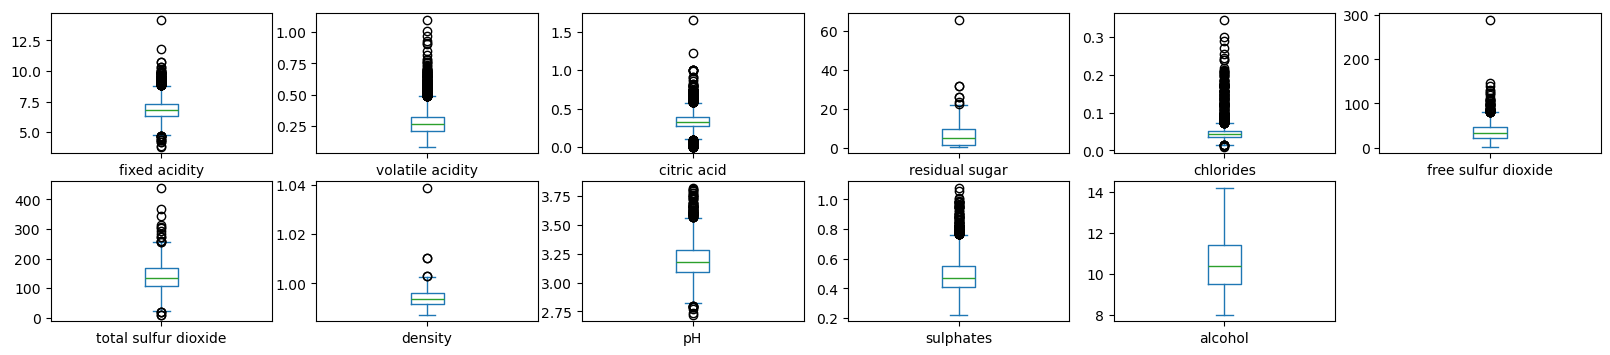

In [6]:
#to check for outliers
#using a 'box plot'
var = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
m_wwdf[var].plot(
    kind = 'box',
    figsize = (20, 4),
    layout = (2, 6),
    subplots = True
    
);


In [7]:
#to check for the number of unique values in the column
m_wwdf["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [8]:
#to count the number of time each item in a particular column occur i.e. frequency
m_wwdf["quality"].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [9]:
#Aufgabe: to evaluate if a wine is of a high or low quality (target) when I input the features
#I will say any wine with quality > 6 is of high quality else it of low quality

##m_wwdf["wineClass"] = m_wwdf["quality"].apply(lambda x: "High" if x > 6 else "low")
##m_wwdf.head(2)



#to drop the wineClass

#m_wwdf = m_wwdf.drop("wineClass", axis = 1)

#m_wwdf.info()

In [10]:
#to define the features(X) data

X = m_wwdf.drop("quality", axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.1 KB


In [11]:
#to define the target(y) data
#1: high and 0:low quality wine
y = m_wwdf["quality"].apply(lambda x: 1 if x > 6 else 0)
y.head()

#NB: y -is the wine of high or low quality

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

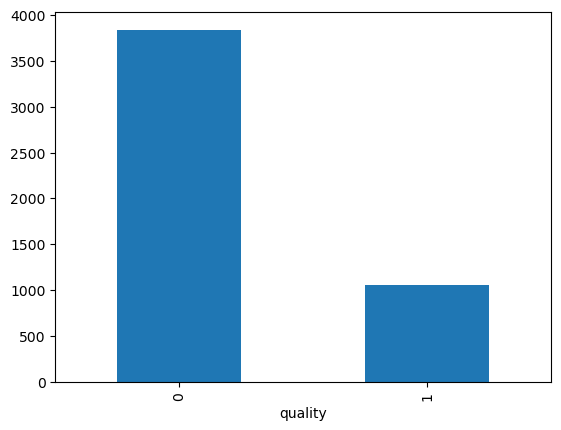

In [12]:
#to check if the data is imbalanced, to determine a suitable balancing method
#to check/test for imbalance

y.value_counts().plot(
    kind = "bar"
);

#result shows there is imbalance as there are more low quality than high quality wines

In [13]:
#SMOTE instance

smote = SMOTE(sampling_strategy = "auto", random_state =42)

#set new X and y data
X_resampled, y_resampled = smote.fit_resample(X, y)

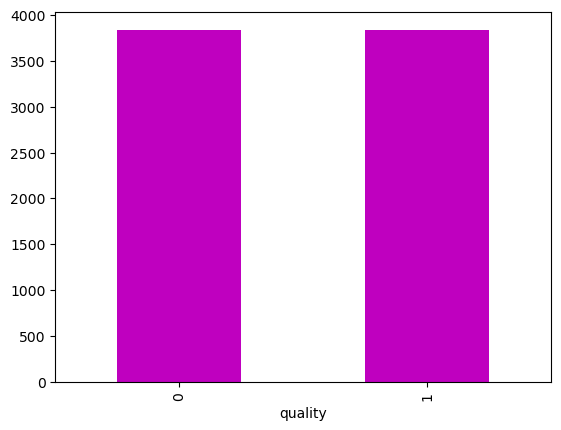

In [14]:
#to check/test for imbalance

y_resampled.value_counts().plot(
    kind = "bar",
    color = "m"
);

#result shows there is a balanced data due to the use of synthetic data and thus equivalent data of low quality and high quality wines

In [15]:
#split the resampled data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

#to check the split

print(X_resampled.shape)
print()
print(X_train.shape)

(7676, 11)

(6140, 11)


In [16]:
#Create model instance
#to train the model using the -Random Forest Classifier

wRF_model = RandomForestClassifier()

In [17]:
#use the model to fit the training model

wRF_model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
#to create predictions with the test data

y_predRF = wRF_model.predict(X_test)

In [19]:
#to compare y_pred and y_test to 2 decimal places

accuracy = accuracy_score(y_test, y_predRF)
print(f"The accuracy score for wRF_model is {accuracy:.3f}. It means the model is predicting pretty accurately.")
print()

precision = precision_score(y_test, y_predRF)
print(f"The precision score for wRF_model is {precision:.3f}")
print()

recall = recall_score(y_test, y_predRF)
print(f"The recall score for wRF_model is {recall:.3f}")
print()

f1 = f1_score(y_test, y_predRF)
print(f"The f1 score for wRF_model is {f1:.3f}")
print()
print("NB: The best performance is 1.")

The accuracy score for wRF_model is 0.906. It means the model is predicting pretty accurately.

The precision score for wRF_model is 0.890

The recall score for wRF_model is 0.927

The f1 score for wRF_model is 0.908

NB: The best performance is 1.


In [20]:
#Insight 

#The ww_model has an accuracy score of 0.913, indicating that it correctly classifies the majority of instances.

#The precision score of 0.898 shows that when the model predicts a positive outcome, it is accurate 89.8% of the time.

#The recall score of 0.931 reflects the model's ability to identify 93.1% of all actual positive cases, 
    #highlighting its effectiveness in capturing relevant instances.

#The F1 score of 0.914 represents a balanced measure of precision and recall, showcasing the model's overall reliability in classification tasks.

#These metrics suggest that the ww_model performs well but still has some room for improvement to achieve optimal performance (1.0).

#### 2. Logistic Regression Classifier

In [21]:
#Create model instance
#to train the model using the -Logistic Regression

wLR_model = LogisticRegression()

In [22]:
#use the model to fit the training model

wLR_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
#to create predictions with the test data

y_predLR = wLR_model.predict(X_test)

In [24]:
#to compare y_pred and y_test to 2 decimal places

accuracy = accuracy_score(y_test, y_predLR)
print(f"The accuracy score for wLR_model is {accuracy:.3f}. It means the model is predicting pretty accurately.")
print()

precision = precision_score(y_test, y_predLR)
print(f"The precision score for wLR_model is {precision:.3f}")
print()

recall = recall_score(y_test, y_predLR)
print(f"The recall score for wLR_model is {recall:.3f}")
print()

f1 = f1_score(y_test, y_predLR)
print(f"The f1 score for wLR_model is {f1:.3f}")
print()
print("NB: The best performance is 1.")

The accuracy score for wLR_model is 0.730. It means the model is predicting pretty accurately.

The precision score for wLR_model is 0.731

The recall score for wLR_model is 0.731

The f1 score for wLR_model is 0.731

NB: The best performance is 1.


In [25]:
#Insight

#The accuracy score for wLR_model is 0.730, indicating that the model correctly classifies a good proportion of instances.

#The precision score of 0.731 suggests that when the model predicts a positive outcome, it is accurate 73.1% of the time.

#The recall score of 0.731 shows that the model successfully identifies 73.1% of all actual positive cases.

#The F1 score of 0.731 represents a balance between precision and recall, reflecting consistent performance across these metrics.

#While the model performs reasonably well, there is noticeable room for improvement to achieve closer to the optimal score of 1.0.

#### 3. Support Vector Classifier (SVC)

In [26]:
#Create model instance
#to train the model using the -SVC

wSV_model = SVC()

In [27]:
#use the model to fit the training model

wSV_model.fit(X_train, y_train)

SVC()

In [28]:
#to create predictions with the test data

y_predSV = wSV_model.predict(X_test)

In [29]:
#to compare y_pred and y_test to 2 decimal places

accuracy = accuracy_score(y_test, y_predSV)
print(f"The accuracy score for wSV_model is {accuracy:.3f}. It means the model is predicting pretty accurately.")
print()

precision = precision_score(y_test, y_predSV)
print(f"The precision score for wSV_model is {precision:.3f}")
print()

recall = recall_score(y_test, y_predSV)
print(f"The recall score for wSV_model is {recall:.3f}")
print()

f1 = f1_score(y_test, y_predSV)
print(f"The f1 score for wSV_model is {f1:.3f}")
print()
print("NB: The best performance is 1.")

The accuracy score for wSV_model is 0.693. It means the model is predicting pretty accurately.

The precision score for wSV_model is 0.676

The recall score for wSV_model is 0.741

The f1 score for wSV_model is 0.707

NB: The best performance is 1.


In [30]:
#Insight

#The accuracy score for wSV_model is 0.693, indicating the model correctly classifies a fair portion of instances.

#The precision score of 0.676 suggests that when the model predicts a positive outcome, it is correct 67.6% of the time.

#The recall score of 0.741 shows that the model successfully identifies 74.1% of all actual positive cases,
    #reflecting better performance in capturing relevant instances.
#The F1 score of 0.707 represents a balance between precision and recall, showing moderate overall performance.

#While the model performs adequately, there is considerable room for improvement to approach the optimal score of 1.0.

In [31]:
#Creating a DataFrame 

comparison_df = pd.DataFrame(
    {
        #item1-value1
        "Models": [
            "Random Forest Classifier",
            "Logistic Regression Classifier",
            "Support Vector Classifier (SVC)"
        ],
        
        #item2-value2
        "Accuracy": [
            accuracy_score(y_test, y_predRF),
            accuracy_score(y_test, y_predLR),
            accuracy_score(y_test, y_predSV)
        ],
        
        #item3-value3
        "Precision": [
            precision_score(y_test, y_predRF),
            precision_score(y_test, y_predLR),
            precision_score(y_test, y_predSV)
        ],
        
        #item4-value4
       "Recall": [
            recall_score(y_test, y_predRF),
            recall_score(y_test, y_predLR),
            recall_score(y_test, y_predSV)
        ],
        
        #item5-value5
        "F1": [
            f1_score(y_test, y_predRF),
            f1_score(y_test, y_predLR),
            f1_score(y_test, y_predSV)
        ],        
    }
)

In [32]:
#calling the DataFrame

comparison_df

,Models,Accuracy,Precision,Recall,F1
0,Random Forest Classifier,0.906250,0.890137,0.927178,0.908280
1,Logistic Regression Classifier,0.730469,0.730819,0.730819,0.730819
2,Support Vector Classifier (SVC),0.692708,0.676157,0.741222,0.707196


In [33]:
#Overall Insight:

#The w_RF model outperforms w_LR and w_SV with higher accuracy and balanced precision, recall, and F1 scores, indicating it is the most 
#effective classifier among the three. w_LR and w_SV show moderate performance but have more room for improvement.


#Recommendation:

#Prioritize the w_RF model for deployment due to its superior performance, while consider tuning hyperparameters or exploring advanced 
#techniques to improve w_LR and w_SV models for specific use cases.



In [34]:
print("Well done! Dami")

Well done! Dami
